## IMPORT PACKAGES

In [1]:
import pandas as pd
import sys
from matplotlib import pyplot as plt
import pickle

sys.path.append('../../')
from utils import microarray_utils, clustering_utils, bokeh_ui_utils, file_utils

/Users/michaelbertagna/anaconda3/envs/cdh2_bokeh.env/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/michaelbertagna/anaconda3/envs/cdh2_bokeh.env/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/michaelbertagna/anaconda3/env

In [2]:
full_filtered_df = pd.read_csv('../microarray_probe_alignment_and_filtering/allgood_filt_agg_tidy_2021aligned_qc_rma_expression_full.csv')
full_filtered_df = full_filtered_df.rename(columns={'Unnamed: 0': 'TTHERM_ID'})
num_genes = full_filtered_df.shape[0]
num_genes

19152

In [3]:
full_filtered_df.sample(10)

,TTHERM_ID,Ll_GSM283687,Ll_GSM284355,Ll_GSM284362,Lm_GSM283690,Lm_GSM284357,Lm_GSM284363,Lh_GSM283691,Lh_GSM284360,Lh_GSM284364,...,C12_GSM656237,C14_GSM285580,C14_GSM285593,C14_GSM656238,C16_GSM285582,C16_GSM285595,C16_GSM656239,C18_GSM285583,C18_GSM285596,C18_GSM656240
7647,TTHERM_00463770,12.319452,11.988721,12.291741,12.559288,12.344145,12.244109,12.642315,12.261038,12.531590,...,13.045610,12.945400,13.122131,13.269054,12.989564,13.110385,12.463114,13.187717,13.210738,12.568262
1806,TTHERM_000672189,6.790087,5.907642,5.707484,7.710696,6.912805,6.201419,8.662518,6.237139,6.874464,...,10.122686,10.561408,10.679999,9.694958,11.741052,11.608532,10.928622,11.382058,11.535878,11.402844
1502,TTHERM_000530017,10.891461,10.611278,11.064824,10.936852,10.615261,11.151681,10.623713,10.567581,10.900944,...,11.821720,10.633452,11.107133,11.355394,11.028537,11.103218,10.959116,11.418959,11.382953,11.454616
7776,TTHERM_00470730,9.669815,10.213664,10.133623,9.455212,9.751093,9.665728,9.298935,9.743880,9.255114,...,7.952720,7.746324,7.551369,7.478810,7.793869,7.551923,7.901753,7.444651,7.443003,7.173789
17570,YF00026279.t1,5.679608,4.022694,6.475073,3.967692,4.156034,4.378093,4.562893,4.980978,4.869729,...,4.462651,4.236582,4.134847,4.531447,4.441762,4.670683,4.799830,3.889370,4.257311,5.010782
376,TTHERM_000145769,9.375504,10.875184,9.449952,9.212746,10.291222,9.717408,9.252202,10.848910,9.235921,...,9.799624,9.113750,8.508062,8.952294,9.276641,9.095549,9.611201,8.811420,9.050757,9.800324
11276,TTHERM_00752220,9.490762,10.107848,9.473996,8.446982,9.595845,9.035144,7.902413,8.854784,8.059752,...,7.929098,7.606841,7.546598,7.222091,7.519518,7.262770,7.446851,6.771920,6.623785,6.939043
5659,TTHERM_00316610,8.847337,8.289841,8.205524,10.209745,8.776179,8.015975,10.389075,8.484495,8.507899,...,9.452134,9.821008,9.379303,9.129742,9.478791,9.295166,8.904949,9.134702,9.255291,9.333832
9446,TTHERM_00584930,13.557831,13.948194,13.550522,13.619277,13.892794,13.773895,13.792188,13.748463,13.743648,...,12.983777,12.749750,12.847211,13.300924,12.277677,12.364579,12.254067,12.117652,12.089204,12.174019
4953,TTHERM_00277390,9.187648,8.024476,8.370200,8.171223,7.735689,8.170613,7.423738,7.543259,7.441397,...,7.348217,6.328943,6.997240,7.327858,6.844573,6.768945,5.204935,7.162326,6.733827,5.871721


In [4]:
full_filtered_norm_df = microarray_utils.normalize_expression_per_gene(full_filtered_df, z=True)

In [5]:
# import numpy as np
# import scipy.stats as st

# def normalizer(array):
#     """
#     Normalizes the values of an array to range from zero to one
#     """
    
#     a = np.array(array)
    
#     normalized = (array - np.min(array)) / (np.max(array) - np.min(array))
    
#     return normalized


# def z_normalizer(array):

#     """
#     Normalizes the values of an array to z-score from mean
#     """

#     # log_a = [np.log10(expr) for expr in array]
#     normalized = pd.Series(st.zscore(array))
#     return normalized


# def normalize_expression_per_gene(expression_df, z=False):
#     """
#     Function to normalize all gene expression to range from zero to one.
#     """
#     if 'TTHERM_ID' in expression_df.columns:
#         ttids = expression_df['TTHERM_ID'].values
#         data = expression_df[list(expression_df.columns)[1:]]

#         columns = expression_df.columns.tolist()

#         if z:
#             norm_expression_df = data.apply(lambda row: z_normalizer(row), axis=1)
#             norm_expression_df.columns = columns[1:]
        
#         else:
#             norm_expression_df = data.apply(lambda row: normalizer(row), axis=1)
        
#         norm_expression_df['TTHERM_ID'] = ttids
#         # norm_expression_df.columns = columns
        
        
#         columns = norm_expression_df.columns.tolist()
        
#         rearrangment = columns[-1:] + columns[:-1]
        
#         norm_expression_df = norm_expression_df[rearrangment]
        
#     else:

#         if z:
#             norm_expression_df = data.apply(lambda row: z_normalizer(row), axis=1)
#             norm_expression_df.columns = columns

#         else:
#             norm_expression_df = expression_df.apply(lambda row: normalizer(row), axis=1)
    
#     return norm_expression_df

In [6]:
# expression_df = full_filtered_df
# data = expression_df[list(expression_df.columns)[1:]]
# ttids = expression_df['TTHERM_ID'].values
# columns = expression_df.columns.tolist()

In [7]:
# normalize_expression_per_gene(full_filtered_df, z=True)

In [8]:
# columns

In [9]:
# data.apply(lambda row: normalizer(row), axis=1)

In [10]:
# data.apply(lambda row: z_normalizer(row), axis=1)

In [11]:
# import numpy as np
# import scipy.stats as st

# def get_arith_mean_expression(expression_df):
#     """
#     Function to take an expression dataframe from the microarrays and collapse it into the means of
#     all replicate chips.
#     """
#     # C2 and S12 got removed during quality control
#     x = [
#         'Ll', 
#         'Lm', 
#         'Lh', 
#         'S0', 
#         'S3', 
#         'S6', 
#         'S9', 
#         # 'S12', 
#         'S15', 
#         'S24', 
#         'C0', 
#         # 'C2', 
#         'C4', 
#         'C6', 
#         'C8', 
#         'C10', 
#         'C12', 
#         'C14', 
#         'C16', 
#         'C18']
    
#     # cols = expression_df.columns[1:]
#     # x = [c for c in x if c in cols]
    
#     condition_expr_dict = {c.split("_")[0]: [] for c in expression_df.columns[1:]}
    
#     for c in list(expression_df.columns)[1:]:
        
#         cond = c.split('_')[0]
#         if cond in condition_expr_dict.keys():
#             expr_list = condition_expr_dict.get(cond, [])

#             # Need to avoid true zeros
#             expr_list.append(expression_df[c].values)
#             condition_expr_dict[cond] = expr_list
        
#     condition_mean_dict = {c: np.mean(np.array(condition_expr_dict[c]), axis=0) for c in condition_expr_dict.keys() if c in x}
    
#     mean_expr_df = pd.DataFrame(condition_mean_dict)
#     mean_expr_df['TTHERM_ID'] = expression_df['TTHERM_ID'].values
#     cols = list(mean_expr_df.columns)
#     reorder = cols[-1:] + cols[:-1]
#     mean_expr_df = mean_expr_df[reorder]
    
#     return mean_expr_df

# def get_geom_mean_expression(expression_df):
#     """
#     Function to take an expression dataframe from the microarrays and collapse it into the means of
#     all replicate chips.
#     """
#     # C2 and S12 got removed during quality control
#     x = [
#         'Ll', 
#         'Lm', 
#         'Lh', 
#         'S0', 
#         'S3', 
#         'S6', 
#         'S9', 
#         # 'S12', 
#         'S15', 
#         'S24', 
#         'C0', 
#         # 'C2', 
#         'C4', 
#         'C6', 
#         'C8', 
#         'C10', 
#         'C12', 
#         'C14', 
#         'C16', 
#         'C18']
    
#     # cols = expression_df.columns[1:]
#     # x = [c for c in x if c in cols]
    
#     condition_expr_dict = {c.split("_")[0]: [] for c in expression_df.columns[1:]}
    
#     for c in list(expression_df.columns)[1:]:
        
#         cond = c.split('_')[0]
#         if cond in condition_expr_dict.keys():
#             expr_list = condition_expr_dict.get(cond, [])

#             # Need to avoid true zeros
#             expr_list.append(expression_df[c].values)
#             condition_expr_dict[cond] = expr_list
        
#     condition_mean_dict = {c: (st.mstats.gmean(np.array(condition_expr_dict[c]) + 1, 0) - 1) for c in condition_expr_dict.keys() if c in x}
    
#     mean_expr_df = pd.DataFrame(condition_mean_dict)
#     mean_expr_df['TTHERM_ID'] = expression_df['TTHERM_ID'].values
#     cols = list(mean_expr_df.columns)
#     reorder = cols[-1:] + cols[:-1]
#     mean_expr_df = mean_expr_df[reorder]
    
#     return mean_expr_df

In [12]:
# expression_df = full_filtered_norm_df

# x = [
#     'Ll', 
#     'Lm', 
#     'Lh', 
#     'S0', 
#     'S3', 
#     'S6', 
#     'S9', 
#     # 'S12', 
#     'S15', 
#     'S24', 
#     'C0', 
#     # 'C2', 
#     'C4', 
#     'C6', 
#     'C8', 
#     'C10', 
#     'C12', 
#     'C14', 
#     'C16', 
#     'C18']

# condition_expr_dict = {c.split("_")[0]: [] for c in expression_df.columns[1:]}

# for c in list(expression_df.columns)[1:]:
    
#     cond = c.split('_')[0]
#     if cond in condition_expr_dict.keys():
#         expr_list = condition_expr_dict.get(cond, [])

#         # Need to avoid true zeros
#         expr_list.append(expression_df[c].values)
#         condition_expr_dict[cond] = expr_list
    
# condition_mean_dict = {c: np.mean(np.array(condition_expr_dict[c]), axis=0) for c in condition_expr_dict.keys() if c in x}

In [13]:
# condition_mean_dict

In [14]:
full_filtered_norm_df

,TTHERM_ID,Ll_GSM283687,Ll_GSM284355,Ll_GSM284362,Lm_GSM283690,Lm_GSM284357,Lm_GSM284363,Lh_GSM283691,Lh_GSM284360,Lh_GSM284364,...,C12_GSM656237,C14_GSM285580,C14_GSM285593,C14_GSM656238,C16_GSM285582,C16_GSM285595,C16_GSM656239,C18_GSM285583,C18_GSM285596,C18_GSM656240
0,TTHERM_000000042,0.288786,0.765776,0.268232,-0.037607,0.295217,0.587974,-1.011146,0.171310,-0.189864,...,-0.480681,1.817354,1.495392,0.447719,-0.352963,0.252773,-1.097159,0.415899,0.016712,-1.491634
1,TTHERM_000000045,-2.588076,-0.950419,-2.554500,-2.288203,-0.417030,-2.147509,-1.454548,-0.403424,-0.725642,...,0.470089,0.976923,0.810478,-0.131281,0.811416,0.476348,-0.113969,1.202888,0.743701,-0.318351
2,TTHERM_00000020,-1.055142,-1.130404,-0.791977,0.848482,-0.685220,-1.033418,1.874801,-1.250214,-0.842567,...,-0.516732,-0.781353,-0.079528,-0.508433,-0.561462,0.975435,-0.500030,-0.707661,-0.302010,-0.716584
3,TTHERM_00000040,0.749737,-1.012130,-0.703158,1.714598,-0.716851,-0.043758,2.711606,-0.814027,-0.289562,...,-1.100621,-0.536737,-0.976995,-0.888980,-0.263667,-0.460844,-0.774760,-0.422050,-0.148029,-0.072443
4,TTHERM_000001189,-0.377774,-0.046772,-0.215900,-0.439750,-0.070273,-0.130351,-0.682063,0.078317,-0.009493,...,0.040025,1.083747,0.865564,1.124013,0.710338,0.633898,1.109981,-0.003376,0.248092,0.814329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,YF00038369.t1,-0.948701,1.006643,-0.753211,-0.112007,0.473345,0.496838,-0.471972,0.056905,-0.201759,...,0.201359,-1.596915,-1.553445,0.487916,-0.301939,-0.946659,1.415327,-0.845751,-0.606985,0.725283
19148,YF00038374.t1,-2.152473,-1.483413,-2.169219,-0.915728,-2.018036,-1.412816,-0.634323,-1.543116,-1.720486,...,0.398846,0.432977,0.193962,1.104747,-0.283537,0.302151,-0.294685,-0.698299,0.346944,0.365318
19149,YF00038376.t1,-0.055358,1.586466,0.678356,0.520574,0.821275,0.625433,1.597859,1.612879,1.093598,...,-0.954965,0.754752,0.803188,-0.542649,1.108638,0.972429,0.170104,1.307818,1.955991,-0.001430
19150,YF00038377.t1,0.116854,0.495125,0.369181,0.635197,0.285647,0.383839,1.688914,-0.226865,-0.360212,...,-0.191681,-0.171261,-0.793810,0.175478,-0.229383,-0.568156,0.858316,-0.885547,-1.670871,0.984977


In [15]:
# get_arith_mean_expression(full_filtered_norm_df)

# LEIDEN CLUSTERING

In [16]:
phases = 'full'

In [17]:
metric = 'manhattan'
# metric='minkowski_3.0'

resolution_param=0.005
# resolution_param=0.0001

n_neighbors = 3

dataset = 'microarray'

In [18]:
leiden_label_df_round_1, partition_stats, cluster_sizes, enriched_cluster_sizes =  clustering_utils.build_label_df(
    full_filtered_df,
    dataset,
    metric=metric,
    n_neighbors=n_neighbors, 
    resolution_param=resolution_param, 
    partition_type = 'EXP', 
    n_jobs = -1, 
    random_state=42
    )

In [19]:
full_filtered_norm_df.head()

,TTHERM_ID,Ll_GSM283687,Ll_GSM284355,Ll_GSM284362,Lm_GSM283690,Lm_GSM284357,Lm_GSM284363,Lh_GSM283691,Lh_GSM284360,Lh_GSM284364,...,C12_GSM656237,C14_GSM285580,C14_GSM285593,C14_GSM656238,C16_GSM285582,C16_GSM285595,C16_GSM656239,C18_GSM285583,C18_GSM285596,C18_GSM656240
0,TTHERM_000000042,0.288786,0.765776,0.268232,-0.037607,0.295217,0.587974,-1.011146,0.171310,-0.189864,...,-0.480681,1.817354,1.495392,0.447719,-0.352963,0.252773,-1.097159,0.415899,0.016712,-1.491634
1,TTHERM_000000045,-2.588076,-0.950419,-2.554500,-2.288203,-0.417030,-2.147509,-1.454548,-0.403424,-0.725642,...,0.470089,0.976923,0.810478,-0.131281,0.811416,0.476348,-0.113969,1.202888,0.743701,-0.318351
2,TTHERM_00000020,-1.055142,-1.130404,-0.791977,0.848482,-0.685220,-1.033418,1.874801,-1.250214,-0.842567,...,-0.516732,-0.781353,-0.079528,-0.508433,-0.561462,0.975435,-0.500030,-0.707661,-0.302010,-0.716584
3,TTHERM_00000040,0.749737,-1.012130,-0.703158,1.714598,-0.716851,-0.043758,2.711606,-0.814027,-0.289562,...,-1.100621,-0.536737,-0.976995,-0.888980,-0.263667,-0.460844,-0.774760,-0.422050,-0.148029,-0.072443
4,TTHERM_000001189,-0.377774,-0.046772,-0.215900,-0.439750,-0.070273,-0.130351,-0.682063,0.078317,-0.009493,...,0.040025,1.083747,0.865564,1.124013,0.710338,0.633898,1.109981,-0.003376,0.248092,0.814329


In [20]:
leiden_label_df_round_1_arranged = bokeh_ui_utils.arrange_modules(full_filtered_norm_df, leiden_label_df_round_1, phases) 
leiden_label_df_round_1_arranged_sorted = leiden_label_df_round_1_arranged.sort_values(by=['label', 'TTHERM_ID'], ascending=False)
leiden_label_df_round_1_arranged_sorted.to_csv('./test_nn3_leiden_label_df_round_1.csv', index=False)

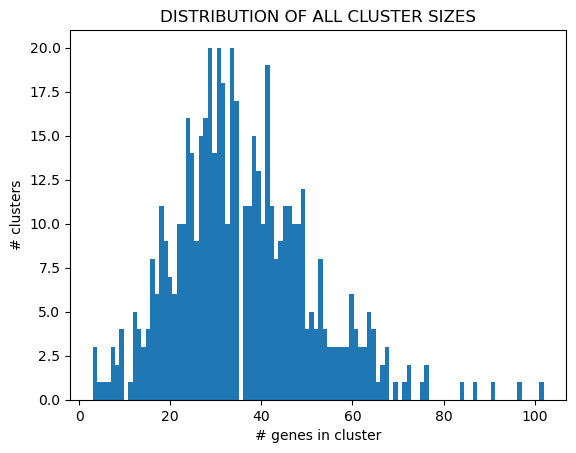

In [21]:
plt.hist(cluster_sizes, max(cluster_sizes))
plt.title('DISTRIBUTION OF ALL CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

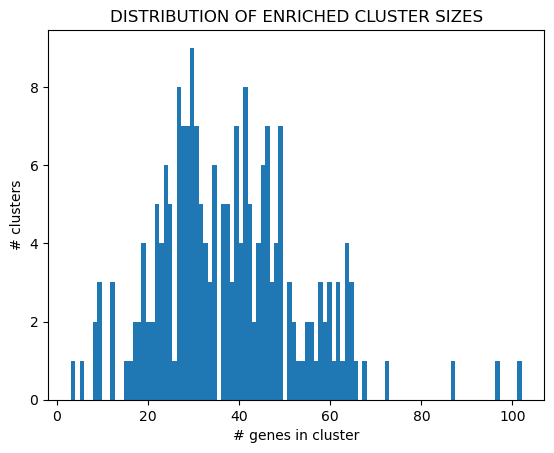

In [22]:
plt.hist(enriched_cluster_sizes, max(enriched_cluster_sizes))
plt.title('DISTRIBUTION OF ENRICHED CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

In [23]:
key_lens = [len(k) for k in partition_stats.keys()]
max_key_len = max(key_lens)

for k, v in partition_stats.items():
    print(f'{" " * (max_key_len - len(k))}{k}:', v)

              partition_type: EXP
              dimensionality: baseline
                      metric: manhattan
                       graph: umap_fuzzy_simplicial_set
                         nns: 3
                  clustering: leiden_cpm
                   parameter: 0.005
            silhouette_score: -0.015687191402746183
                  modularity: 0.7512632695781946
                   nclusters: 532
           mean_cluster_size: 36.0
         median_cluster_size: 34.0
             sd_cluster_size: 15.077494057955027
          nenriched_clusters: 209
  mean_enriched_cluster_size: 37.78468899521531
median_enriched_cluster_size: 36.0
    sd_enriched_cluster_size: 15.715672092061157
     nenriched_cluster_genes: 7897
                    datetime: 2024-05-06 16:45:20.838194


In [24]:
enrich_full_nn3 = clustering_utils.compute_enrichment(leiden_label_df_round_1_arranged_sorted)

In [25]:
outfile='../enrichment/test_nn3_full_enrichment.csv'
enrich_full_nn3.to_csv(outfile, index=False)

In [26]:
complete_annot = pd.read_csv('../eggnog/complete_eggnog_annotation.csv')

In [27]:
palette45 = """
#51635F\n#FF1C16\n#16FC26\n#403DFC\n#FE0DCE\n#F9AA00\n#00FFD5\n#22BFFE\n#BB3551\n#E6FE97\n#ECADFF\n#FFBFBD\n#CF00F5\n#0D8B00\n#D7FEFF\n#8D7200\n#F76C00\n#AD3288\n#5C5AB8\n#FC0080\n#B8FF16\n#00AAB4\n#FBE11C\n#9AAAD9\n#8BBB8C\n#934B47\n#6EFE99\n#9C6D91\n#FB9778\n#9D32AF\n#D40087\n#FFDC9D\n#FF8DB6\n#A96AFC\n#FDDDFB\n#168CF7\n#FD6CF9\n#F64553\n#4D6A00\n#FAFEDB\n#A7977D\n#0DFBFF\n#86B80D\n#FD8AE4\n#B7B126
""".split()

palette32 = """
white\n#F91622\n#16FC0D\n#5138FB\n#FD00CF\n#FDD51C\n#16FDD7\n#FC8B8E\n#16BFFF\n#DF9BFD\n#669C2A\n#FEE7C4\n#F31685\n#DF16FD\n#C1F1FE\n#A23D7E\n#D5FD0D\n#8C5A0D\n#FC790D\n#4F5CBC\n#FFCBEF\n#168D72\n#68FA93\n#C4FDC9\n#F7A449\n#16789B\n#AD0DAB\n#C4262E\n#0DF1FF\n#EFF994\n#B6C1FE\n#8F22CD
""".split()

palette35 = """
#585F6A\n#FE1626\n#00FB0D\n#2E40FC\n#FD0DCE\n#FCD200\n#F7868C\n#16FFDC\n#22BEFB\n#D28EF6\n#609000\n#FFE7C9\n#F51683\n#FF730D\n#CAFE16\n#AA3586\n#BEEEFD\n#BD00FA\n#895D22\n#FEC7F0\n#495AA1\n#73F995\n#229270\n#ED963B\n#F6FE97\n#C5FFD0\n#C50DC8\n#6993FF\n#C22A35\n#16ECFC\n#AA707E\n#7A3BCB\n#7C845C\n#358FAA\n#BDBAF6
""".split()

palette38 = """
#636265\n#F60D16\n#00F90D\n#3540FB\n#FD0DD0\n#FDDB0D\n#00FFE2\n#FA8884\n#2ABEFE\n#E5A3FF\n#518F00\n#FEFDD5\n#D51CFF\n#ED007F\n#A33879\n#96731C\n#C8FB16\n#C0ECFE\n#FBC1DA\n#5658BA\n#F96900\n#F69F1C\n#58FA9C\n#008E72\n#BA22B9\n#167D97\n#794D8A\n#CEFE9C\n#BB222E\n#954D45\n#00DCEF\n#FD66B0\n#B2FDD3\n#FDBD9F\n#A9B4F1\n#B371FE\n#849566\n#2A8EFF
""".split()

palette64 = """
white\n#FA002E\n#22FC22\n#221CFA\n#FF3DD6\n#FFDA00\n#00FEFB\n#F48684\n#CEB4FE\n#FFFFE5\n#0D933D\n#CC00F8\n#800D5D\n#F10084\n#22267A\n#0DADFF\n#CBFD71\n#9A761C\n#F96C00\n#6399A6\n#FFBCDA\n#8D0DA3\n#F79F26\n#00FFBF\n#A37CFB\n#F68EEB\n#720D0D\n#F163AA\n#7E926A\n#826386\n#B41C32\n#9BEBCE\n#E2DB83\n#56D4FA\n#E6E2FB\n#925D58\n#F7C3A7\n#62E970\n#220DBD\n#5583BB\n#7EA01C\n#CDFDB6\n#FD00FB\n#B30D97\n#F5FF00\n#DD77FD\n#4282FC\n#BBA6A4\n#0D8068\n#AB5F26\n#F7C26E\n#9EFE00\n#9B2EFD\n#C56887\n#FD3D68\n#ABF2FD\n#835FAC\n#FF16B1\n#325371\n#CA16CA\n#D26322\n#AFCFFE\n#91A1FA\nfloralwhite
""".split()

palette65 = """
white\ngainsboro\n#FA002E\n#22FC22\n#221CFA\n#FF3DD6\n#FFDA00\n#00FEFB\n#F48684\n#CEB4FE\n#FFFFE5\n#0D933D\n#CC00F8\n#800D5D\n#F10084\n#22267A\n#0DADFF\n#CBFD71\n#9A761C\n#F96C00\n#6399A6\n#FFBCDA\n#8D0DA3\n#F79F26\n#00FFBF\n#A37CFB\n#F68EEB\n#720D0D\n#F163AA\n#7E926A\n#826386\n#B41C32\n#9BEBCE\n#E2DB83\n#56D4FA\n#E6E2FB\n#925D58\n#F7C3A7\n#62E970\n#220DBD\n#5583BB\n#7EA01C\n#CDFDB6\n#FD00FB\n#B30D97\n#F5FF00\n#DD77FD\n#4282FC\n#BBA6A4\n#0D8068\n#AB5F26\n#F7C26E\n#9EFE00\n#9B2EFD\n#C56887\n#FD3D68\n#ABF2FD\n#835FAC\n#FF16B1\n#325371\n#CA16CA\n#D26322\n#AFCFFE\n#91A1FA\nfloralwhite
""".split()

In [28]:
palette36 = ["#FFFFFF", 
             "#E4E1E3", 
             "#F6222E", 
             "#FE00FA", 
             "#16FF32", 
             "#3283FE", 
             "#FEAF16", 
             "#B00068", 
             "#1CFFCE",
             "#90AD1C", 
             "#2ED9FF", 
             "#DEA0FD", 
             "#AA0DFE", 
             "#F8A19F", 
             "#325A9B", 
             "#C4451C", 
             "#1C8356", 
             "#85660D",
             "#B10DA1", 
             "#FBE426", 
             "#1CBE4F", 
             "#FA0087", 
             "#FC1CBF", 
             "#F7E1A0", 
             "#C075A6", 
             "#782AB6", 
             "#AAF400",
             "#BDCDFF", 
             "#822E1C", 
             "#B5EFB5", 
             "#7ED7D1", 
             "#1C7F93", 
             "#D85FF7", 
             "#683B79", 
             "#66B0FF", 
             "#3B00FB",
             "magenta"]

change index 5 to #778899. Change index 9 to #2F4F4F. Add #FF7F50. Change index 9 to #FFBCD9. Change index 14 to #DEA5A4

In [29]:
palette27 = ["#FFFFFF", 
             "#AA0DFE", 
             "#3283FE", 
             "#85660D", 
             "#782AB6", 
             "#778899", 
             "#1C8356", 
             "#16FF32", 
             "#F7E1A0", 
#              "#2F4F4F",
             "#FFBCD9", 
             "#C4451C", 
             "#DEA0FD", 
             "#FE00FA", 
#              "#325A9B", 
             "#FEAF16", 
             "#DEA5A4", 
             "#90AD1C", 
             "#F6222E",
             "#1CFFCE", 
             "#2ED9FF", 
             "#B10DA1", 
#              "#C075A6", 
#              "#FC1CBF", 
#              "#B00068", 
             "#FBE426", 
             "#FA0087",
             "#FF7F50"
            ]

In [30]:
with open(('colors_2000_1'), 'rb') as file:
    color_palette_raw = pickle.load(file)

color_palette = palette65

if len(color_palette_raw) >= max(leiden_label_df_round_1_arranged_sorted['label'].unique()) + 1:
    color_palette = color_palette_raw[:max(leiden_label_df_round_1_arranged_sorted['label'].unique()) + 1]

In [31]:
import numpy as np
cols = full_filtered_norm_df.columns
np.min(full_filtered_norm_df[cols[1:]].values)

-6.202967337930747

In [32]:
# import numpy as np
# from bokeh.models import Button, ColumnDataSource, CustomJS
# from bokeh.plotting import Column, figure, show

# x = np.linspace(0, 20, 200)
# y = x**2

# source = ColumnDataSource(data=dict(x=x, y=y))

# p = figure(tools="xpan")
# p.line("x", "y", source=source)

# button = Button()
# button.js_on_click(
#     CustomJS(args={"xr": p.x_range, "yr": p.y_range, "source": source}, code="""
#         const i = Math.max(source.data.x.findIndex((x) => x > xr.start), 0)

#         const j0 = source.data.x.findIndex((x) => x > xr.end)
#         const j = j0 >= 0 ? j0 : source.data.x.length - 1

#         const ysub = source.data.y.slice(i, j)

#         yr.start = Math.min.apply(null, ysub);
#         yr.end = Math.max.apply(null, ysub);
#     """)
# )

# show(Column(p, button))

In [33]:
import os

embedding_metric='manhattan'

dashboard_path = file_utils.generate_uniquely_numbered_export_path('./plots/', 'dashboard', '.html', tags=['microarr', 'umap', metric, f'{n_neighbors}nn', f'{resolution_param}rp'])

p = bokeh_ui_utils.generate_and_save_umap(dashboard_path, full_filtered_norm_df, complete_annot, leiden_label_df_round_1_arranged_sorted, 'full', color_palette, os.path.basename(dashboard_path), expr_min=-3, expr_max=3, n_neighbors=n_neighbors, embedding_metric=embedding_metric, z=True)

/Users/michaelbertagna/anaconda3/envs/cdh2_bokeh.env/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/michaelbertagna/git/TGNE-2022/TGNE/embedding/../../utils/bokeh_ui_utils.py:495: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hm_df['module'] = hover_data['module'].values


./plots/dashboard320_microarr_umap_manhattan_3nn_0.005rp.html


In [34]:
mucocyst_cluster = [
'YF00036312.t1',
'YF00012829.t1',
'YF00000889.t1',
'TTHERM_00527180',
'TTHERM_00335830',
'YF00012830.t1',
'YF00009126.t1',
'YF00005954.t1',
'YF00005804.t1',
'TTHERM_01055600',
'TTHERM_00624720',
] # TTHERM_00630470: mucocyst gene with drastically different expression profile

In [35]:
print(','.join(mucocyst_cluster))

YF00036312.t1,YF00012829.t1,YF00000889.t1,TTHERM_00527180,TTHERM_00335830,YF00012830.t1,YF00009126.t1,YF00005954.t1,YF00005804.t1,TTHERM_01055600,TTHERM_00624720


In [36]:
clustering_utils.fraction_max_same_cluster_genes(mucocyst_cluster, leiden_label_df_round_1_arranged_sorted)

UTILS:  11
4 / 7 = 0.5714285714285714
           TTHERM_ID  label
15857  YF00012830.t1      0
15327  YF00009126.t1      0
14900  YF00005954.t1      0
14894  YF00005804.t1      0
YF00012830.t1,YF00009126.t1,YF00005954.t1,YF00005804.t1


0.5714285714285714